In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import sygma as s
import os

In [2]:
%run read_wiersma_figures

In [3]:
## Parameter for standard best fit
iniZ_st=0.0126
imf_type_st='chabrier'
imf_bdys_st=[0.1,100] #based on paper p. 18 (and tests on p.19)
imf_yields_range_st=[0.8,100]  #0.8 based on calculations in paper p.19, paper uses 40Msun but then messses up plots, 100Msun good agreement.
sn1a_rate_st='exp' #based on paper .p. 23
exp_dtd_st=2e9  #based on paper p. 23
direct_norm_1a_st=0.016 #better fit #0.02, #based on paper p. 23 (a parameter, see also p22)
dt_st=7e6
transitionmass_st=8 #6.8 #chosen to match the AGB and massive star  intersection.
yield_interp_st='wiersma' # means we correct for initial abundance as in wiersma (independent if yields are net yields or not.)
netyields_on_st=True #tells the code we actual use tabula.ted net yields. 
wiersmamod_st=True
table_st='yield_tables/isotope_yield_table_portinari98_marigo01.txt'
exclude_masses_st=[] #needs to be empty else 60Msun exlcuded!, cannot justify NOT to use 6,7Msun
sn1a_table_st='yield_tables/sn1a_t03.txt'
iniabu_table_st='yield_tables/iniabu/iniab_solar_Wiersma.ppn'
mgal_st = 1e4 #made to sygma.py defualt, #reasonable choice, high resolution of  mass of a particle ejected in a hydro simulation.

In [4]:
s0=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=imf_yields_range_st,
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=transitionmass_st,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table=iniabu_table_st)

SYGMA run in progress..
   SYGMA run completed - Run time: 1.47s


## Fig. 1

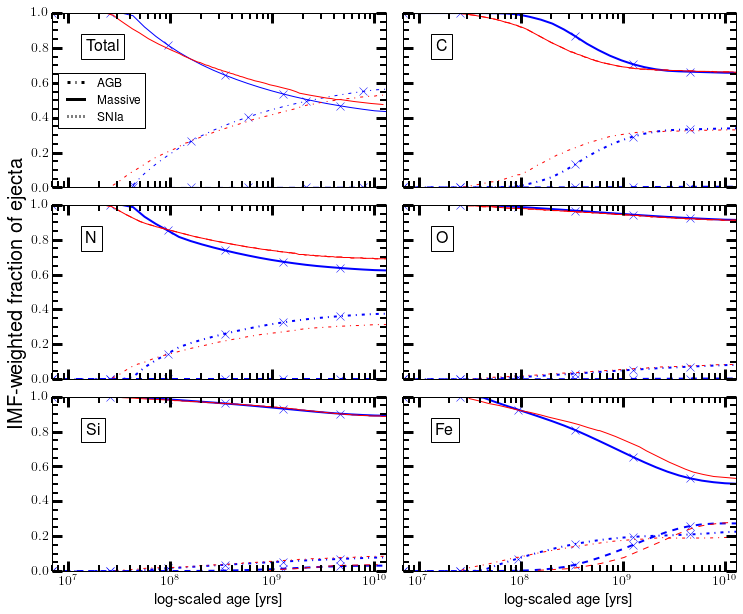

In [5]:
%matplotlib inline
markevery=5
plt.close(2)
props = dict(boxstyle='square', facecolor='w', alpha=1)
f, axarr = plt.subplots(3, 2)
elements=['Total','C','N','O','Si','Fe']
for specie in elements:
        specieW=specie
    #specie='Ba-132'
        if specie=='Total':
            plt.sca(axarr[0, 0])
        if specie=='C':
            plt.sca(axarr[0, 1])
        elif specie=='N':
            plt.sca(axarr[1, 0])
        elif specie=='O':
            plt.sca(axarr[1, 1])
        elif specie=='Si':
            plt.sca(axarr[2, 0])
        elif specie=='Fe':
            plt.sca(axarr[2, 1])
        #s1.plot_mass(fig=fig,yaxis=specie,norm=True,label=specie,color='k',shape='-',marker='o')
        if not 'G-1' in elements and specie=='Total':
            specieW='tot'
            s0.plot_totmasses(fig=1,source='agb',norm='current',color='b',
                  label='AGB, Z=1e-4',shape='-.',marker='x',log=False,markevery=markevery)
            s0.plot_totmasses(fig=1,source='massive',norm='current',color='b',
                  label='Massive, Z=1e-4',shape='-',marker='x',log=False,markevery=markevery)
            s0.plot_totmasses(fig=1,source='sn1a',norm='current',color='b',
                  label='SN1a, Z=1e-4',shape='--',marker='x',log=False,markevery=markevery)   
            [x,y]=getW(fig=2,specie=specieW,source='agb',Z=0.02)
            plt.plot(x,y,color='r',linestyle='-.')    
            [x,y]=getW(fig=2,specie=specieW,source='massive',Z=0.02)
            plt.plot(x,y,color='r')
        else:
            if specie=='G-1':
                 specieW='tot'
            s0.plot_mass(fig=1,specie=specie,source='agb',norm='current',color='b',
                     label=specie+' (AGB), Z=2e-2',shape='-.',marker='x',markevery=markevery)
            s0.plot_mass(fig=1,specie=specie,source='massive',norm='current',color='b',
                     label=specie+' (massive), Z=2e-2',shape='-',marker='x',markevery=markevery)
            s0.plot_mass(fig=1,specie=specie,source='sn1a',norm='current',color='b',
                     label=specie+' (SN1a), Z=2e-2',shape='--',marker='x',markevery=markevery)
            [x,y]=getW(fig=2,specie=specieW,source='agb',Z=0.02)
            plt.plot(x,y,color='r',linestyle='-.')    
            [x,y]=getW(fig=2,specie=specieW,source='massive',Z=0.02)
            plt.plot(x,y,color='r',linestyle='-')
            if not specie in ['N','C','O','G-1']:
                [x,y]=getW(fig=2,specie=specieW,source='sn1a',Z=0.02)
            plt.plot(x,y,color='r',linestyle='--')  

        ax=plt.gca()
        ax.text(0.1, 0.85, specie, transform=ax.transAxes, fontsize=16,verticalalignment='top', bbox=props)                
        ax.minorticks_on()
        plt.title('')
        plt.legend().set_visible(False)
        if (specie=='N'):
            ax.set_ylabel('IMF-weighted fraction of ejecta',size=20)
        elif not ( ((specie=='Total') or ( specie=='N')) or ( specie=='Si')):
            ax.get_yaxis().set_ticklabels([]) #set_visible(False)
            plt.ylabel('')
        else:
            plt.ylabel('')
        if specie=='Total':
            plt.plot([],[],marker='',linestyle='-.',color='k',label='AGB',linewidth=3)
            plt.plot([],[],marker='',linestyle='-',color='k',label='Massive',linewidth=3)
            plt.plot([],[],marker='',linestyle=':',color='k',label='SNIa',linewidth=3)            
            l2=ax.lines[-3:]
            plt.legend(l2,('AGB','Massive','SNIa'),loc=6,prop={'size': 12}).set_visible(True) 
        if specie in ['Total','C','N','O']:
            ax.get_xaxis().set_ticklabels([])
            plt.xlabel('')
        plt.ylim(0,1)
#general settings
fig=plt.gcf()        
fig.set_size_inches(20,10) #figsize=(6, 4)
plt.subplots_adjust(hspace=0.1, bottom=0.125,wspace=0.05)#,left=0.1)

## Fig. 2

[]

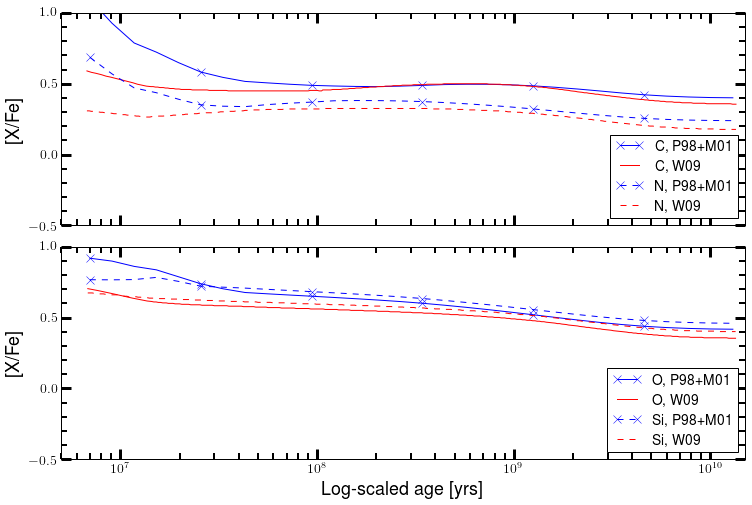

In [6]:
plt.close(1);plt.close(3)
markevery=5
f, axarr = plt.subplots(2, 1)
plt.sca(axarr[0])
#ax1.get_xaxis().set_visible(True)
#plt.close(fig)
yaxis='[C/Fe]'
s0.plot_spectro(fig=1,xaxis='age',yaxis=yaxis,source='all',label='C, solar',shape='-',marker='x', \
                color='b',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn')
[x,y]=getW(fig=3,specie='[C/Fe]',source='all',Z=0.02)
plt.plot(x,y,color='r')
yaxis='[N/Fe]'
s0.plot_spectro(fig=1,xaxis='age',yaxis=yaxis,source='all',label='N, solar',shape='--',marker='x', \
                color='b',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn')
[x,y]=getW(fig=3,specie='[N/Fe]',source='all',Z=0.02)
plt.plot(x,y,color='r',linestyle='--')
plt.legend(loc=1)
plt.ylabel('[X/Fe]')
plt.xlim(5e6,1.5e10)
plt.ylim(-0.5,1)
ax=plt.gca();ax.minorticks_on()
plt.yticks(np.arange(-0.5, 1.5, 0.5))
#plt.plot([],[],marker='x',linestyle='-',color='b',label='C, NuGrid',linewidth=3)
#plt.plot([],[],marker='',linestyle='-',color='r',label='C, PM',linewidth=3)
#plt.plot([],[],marker='x',linestyle='--',color='b',label='N, NuGrid',linewidth=3)
#plt.plot([],[],marker='',linestyle='--',color='r',label='N, PM',linewidth=3)
l2=ax.lines[-4:]; plt.legend(l2,('C, P98+M01','C, W09','N, P98+M01','N, W09'),loc=4,prop={'size': 14})
fig=plt.gcf();fig.set_size_inches(20,5)
ax.set_xlabel('')
plt.ylabel('[X/Fe]',size=18)

#ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.sca(axarr[1])

#plt.sca(ax2)
fig=plt.gcf()

yaxis='[O/Fe]'
s0.plot_spectro(fig=1,xaxis='age',yaxis=yaxis,source='all',label='O, solar',shape='-',marker='x', \
                color='b',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn')
[x,y]=getW(fig=3,specie='[O/Fe]',source='all',Z=0.02)
plt.plot(x,y,color='r',linestyle='-')
yaxis='[Si/Fe]'
s0.plot_spectro(fig=1,xaxis='age',yaxis=yaxis,source='all',label='Si, solar',shape='--',marker='x', \
                color='b',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn')

[x,y]=getW(fig=3,specie='[Si/Fe]',source='all',Z=0.02)
plt.plot(x,y,color='r',linestyle='--')
plt.legend(loc=1)
plt.ylabel('[X/Fe]')
plt.xlim(1e7,1.5e10)
plt.legend(loc=1)
plt.ylabel('[X/Fe]')
plt.xlim(5e6,1.5e10)
plt.ylim(-0.5,1)
ax2=plt.gca()
ax2.minorticks_on()
ax=plt.gca();ax.minorticks_on()
plt.yticks(np.arange(-0.5, 1.5, 0.5))
#plt.plot([],[],marker='x',linestyle='-',color='b',label='C, NuGrid',linewidth=3)
#plt.plot([],[],marker='',linestyle='-',color='r',label='C, W09',linewidth=3)
#plt.plot([],[],marker='x',linestyle='--',color='b',label='N, NuGrid',linewidth=3)
#plt.plot([],[],marker='',linestyle='--',color='r',label='N, PM',linewidth=3)
l2=ax.lines[-4:]; plt.legend(l2,('O, P98+M01','O, W09','Si, P98+M01','Si, W09'),loc=4,prop={'size': 14})
fig=plt.gcf();fig.set_size_inches(20,8)
plt.ylabel('[X/Fe]',size=18)
plt.subplots_adjust(hspace=0.1, bottom=0.125,wspace=0.05)#,left=0.1)
plt.xlabel('Log-scaled age [yrs]',size=18)
axarr[0].get_xaxis().set_ticklabels([])

## Fig.  3 (top)

In [7]:
s1=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=imf_yields_range_st,
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=6.8,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table=iniabu_table_st)

s2=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=imf_yields_range_st,
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=9,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table=iniabu_table_st)

SYGMA run in progress..
   SYGMA run completed - Run time: 1.74s
SYGMA run in progress..
   SYGMA run completed - Run time: 1.32s


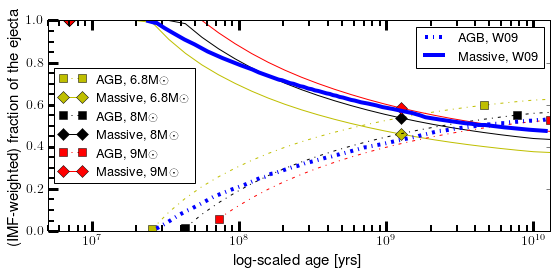

In [8]:
#%pylab nbagg
fig=931
figW=2
Z=0.02
specie='tot'
plt.close(fig)
plt.figure(fig)
s2.plot_totmasses(fig=fig,source='agb',color='y',shape='-.',norm='current',fsize=[10,6])
s2.plot_totmasses(fig=fig,source='massive',color='y',shape='-',norm='current',fsize=[10,6])  
s0.plot_totmasses(fig=fig,source='agb',color='k',shape='-.',norm='current',fsize=[10,6])
s0.plot_totmasses(fig=fig,source='massive',color='k',shape='-',norm='current',fsize=[10,6])      
s1.plot_totmasses(fig=fig,source='agb',color='r',shape='-.',norm='current',fsize=[10,6])
s1.plot_totmasses(fig=fig,source='massive',color='r',shape='-',norm='current',fsize=[10,6])    
plt.yscale('linear');plt.ylim(0,1)
plt.ylabel('(IMF-weighted) fraction of the ejecta')
plt.title('')
plt.ylim(0,1)
if True:
        ax=plt.gca()
        ax.minorticks_on()
        plt.plot([],[],marker='o',linestyle='-',color='r',label='AGB',linewidth=3)
        plt.plot([],[],marker='s',linestyle='-',color='b',label='Massive',linewidth=3)
        plt.plot([],[],marker='x',linestyle='-',color='g',label='SNIa',linewidth=3)
        plt.plot([],[],marker='D',linestyle='-',color='g',label='SNIa',linewidth=3)
        l2=ax.lines
        ax.legend(l2,('AGB, '+str(s1.transitionmass)+'M_${\odot}$','Massive, '+str(s1.transitionmass)+'M_${\odot}$',
                       'AGB, '+str(s0.transitionmass)+'M_${\odot}$','Massive, '+str(s0.transitionmass)+'M_${\odot}$',
                       'AGB, '+str(s2.transitionmass)+'M_${\odot}$','Massive, '+str(s2.transitionmass)+'M_${\odot}$')
                       ,loc=6,prop={'size': 13})
        
ax2=ax.twinx()       
[age,y_agb]=getW(fig=figW,specie=specie,source='agb',Z=Z)
ax2.plot(age,y_agb,color='b',linestyle='-.',linewidth=4)
[age,y_massive]=getW(fig=figW,specie=specie,source='massive',Z=Z)
ax2.plot(age,y_massive,color='b',linestyle='-',linewidth=4)
l2=ax2.lines
ax2.legend(l2[:2],('AGB, W09','Massive, W09'),loc=1,prop={'size': 13})
plt.xlim(5e6,13e9)
ax2.get_yaxis().set_ticklabels([])
#plt.tight_layout()
fig=plt.gcf();fig.set_size_inches(8,4,forward=True)
#plt.tight_layout()
plt.tight_layout()

## Fig. 3 (bottom)

In [9]:
s1_imf=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=[0.8,40],
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=transitionmass_st,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table=iniabu_table_st)

s2_imf=s.sygma(iolevel=0,iniZ=iniZ_st,imf_type=imf_type_st,
           imf_bdys=imf_bdys_st, 
           imf_yields_range=[0.8,29],
           sn1a_rate=sn1a_rate_st, 
           exp_dtd=exp_dtd_st, 
           direct_norm_1a=direct_norm_1a_st, 
            dt=dt_st,
           transitionmass=transitionmass_st,
           yield_interp=yield_interp_st,
           netyields_on=netyields_on_st,
            wiersmamod=wiersmamod_st,
           table=table_st, \
           exclude_masses=exclude_masses_st,
           sn1a_table=sn1a_table_st,iniabu_table=iniabu_table_st)

SYGMA run in progress..
   SYGMA run completed - Run time: 1.42s
SYGMA run in progress..
   SYGMA run completed - Run time: 1.39s


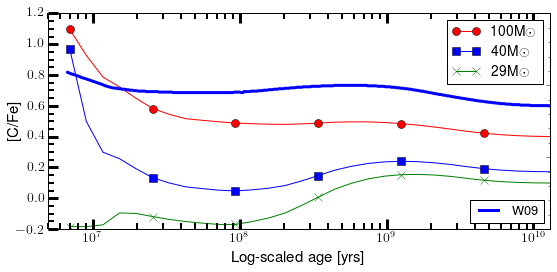

In [10]:
fig=4424123
plt.close(fig)
yaxis='[C/Fe]'
markevery=5
s0.plot_spectro(fig=fig,xaxis='age',yaxis=yaxis,source='all',label='C, solar',shape='-',marker='o', \
                color='r',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn',fsize=[10,6])

s1_imf.plot_spectro(fig=fig,xaxis='age',yaxis=yaxis,source='all',label='C, solar',shape='-',marker='s', \
                color='b',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn',fsize=[10,6])
s2_imf.plot_spectro(fig=fig,xaxis='age',yaxis=yaxis,source='all',label='C, solar',shape='-',marker='x', \
                color='g',markevery=markevery,solar_ab='yield_tables/iniabu/iniab_solar_Wiersma.ppn',fsize=[10,6],rspace=0.6)
ax=plt.gca()
ax.set_ylabel('[C/Fe]',labelpad=-5.)
ax.minorticks_on()
fig=plt.gcf();#fig.set_size_inches(12,5)
l2=ax.lines[-4:]
ax.legend(l2,(str(s0.imf_yields_range[1])+'M_${\odot}$''',str(s1_imf.imf_yields_range[1])+'M_${\odot}$',str(s2_imf.imf_yields_range[1])+'M_${\odot}$')
        ,loc=1,prop={'size': 14})
       
ax2=ax.twinx()
[x,y]=getW(fig=3,specie='[C/Fe]',source='all',Z=0.02)
ax2.plot(x,y,color='b',linewidth=3,label='W09')
l2=ax2.lines
plt.xlim(5e6,1.5e10)
plt.ylim(-0.5,1)
ax=plt.gca();ax.minorticks_on()
plt.yticks(np.arange(-0.5, 1.5, 0.5))
fig=plt.gcf();#fig.set_size_inches(20,5)        
#ax.set_ylabel('[C/Fe]',size=20)
plt.xlabel('Log-scaled age [yrs]',size=20)
#plt.xlim(5e6,1e8)
plt.xlim(5e6,13e9)
#plt.ylim(-0.5,1.5)
s0.imf_yields_range
#plt.title('Different upper imf boundaries')
fig=plt.gcf()
#plt.tight_layout()
fig=plt.gcf();fig.set_size_inches(8,4,forward=True)
#plt.tight_layout()
ax2.get_yaxis().set_ticklabels([])
ax2.legend(loc=4,prop={'size': 13})
plt.tight_layout()

## Fig. 4

/media/christian/ExtDrive64/NuGrid/Ipython/venv/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


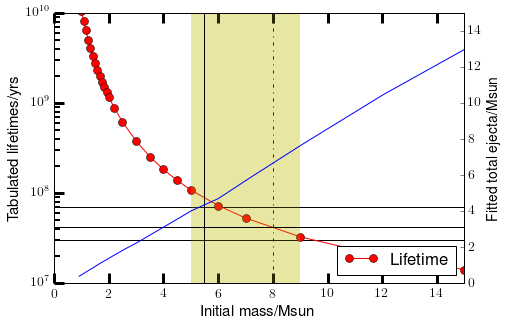

In [11]:
fign=3123511
%matplotlib inline
plt.close(fign)
s0.plot_table_lifetimes(fig=fign,iniZ=0.0127,table='yield_tables/isotope_yield_table_portinari98_marigo01.txt',label='Lifetime')
fig=plt.gcf();fig.set_size_inches(12,5);
plt.legend(loc=4)
plt.hlines(3e7,0,20);plt.hlines(7e7,0,20)
plt.ylim(1e7,1e10);#plt.hlines(2e7,0,20,linestyle='--')
#plt.vlines(5,1e7,1e10,linestyle='--')
plt.vlines(8,1e7,1e10,linestyle='-.')
plt.axvspan(5, 9, color='y', alpha=0.2, lw=0)
plt.ylabel('Tabulated  lifetimes/yrs')
ax=plt.gca()
ax2=ax.twinx()
mtotej=[]
mstars=s0.m_stars
x=[]
for m in np.arange(s0.imf_bdys[0],s0.imf_bdys[-1],0.1):
    x.append(s0.func_total_ejecta(m))
mstars=x
for k in range(len(mstars)):
    mtotej.append(s0.func_total_ejecta(mstars[k]))
ax2.plot(mstars,mtotej)#,marker='x',label='ejecta')
ax2.set_ylim(0,15)
ax2.set_ylabel('Fitted total ejecta/Msun')
ax2.legend(loc=1)
plt.xlim(0,15)
plt.axvspan(5, 9, color='y', alpha=0.2, lw=0)
plt.hlines(3.09,0,15)
plt.vlines(5.5,0,15)